# Merging all the csv files for lake Sammamish

In [33]:

import pandas as pd 

df_1 = pd.read_csv("../Resources_Ritu/0512_lake_Union.csv").drop(['Unnamed: 0'],axis=1)

df_2 = pd.read_csv("../Resources_Ritu/0518_lake_Union.csv").drop(['Unnamed: 0'],axis=1)

df_3 = pd.read_csv("../Resources_Ritu/0536_lake_Union.csv").drop(['Unnamed: 0'],axis=1)

df_4 = pd.read_csv("../Resources_Ritu/0540_lake_Union.csv").drop(['Unnamed: 0'],axis=1)



In [34]:
# append multiple DataFrames

WQI_df = pd.concat([df_1, df_2, df_3, df_4], ignore_index=True)
print(WQI_df.shape)
WQI_df.head()

(4694, 12)


,CollectDate,Ammmonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
0,1997-01-23,0.024,99.0,10.9,160.0,0.310,0.0136,7.4,6.6,0.493,0.0289,112.040025
1,1997-01-23,0.021,101.0,10.8,160.0,0.302,0.0129,7.3,6.6,0.477,0.0298,108.949937
2,1997-02-04,0.027,87.6,10.3,63.0,0.328,0.0134,7.2,6.5,0.452,0.0236,116.578320
3,1997-02-04,0.028,93.5,10.7,63.0,0.336,0.0136,7.2,6.5,0.465,0.0265,120.222802
4,1997-03-04,0.020,116.0,11.3,160.0,0.344,0.0181,7.5,6.8,0.464,0.0269,120.502157


In [35]:
# Create the output file (CSV)

output_data_file = "../Resources_Ritu/Big_lake_Union.csv"

# Export the clean water quality data 

WQI_df.to_csv(output_data_file, index="CollectDate")

# Preprocessing the Data for Neural Network

In [36]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf


#  Import and read the charity_data.csv.
import pandas as pd 
#WQI_df = pd.read_csv("../Resources_Ritu/0611_lake_Sammamish.csv").drop(['Unnamed: 0'],axis=1)

WQI_df.head()

,CollectDate,Ammmonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
0,1997-01-23,0.024,99.0,10.9,160.0,0.310,0.0136,7.4,6.6,0.493,0.0289,112.040025
1,1997-01-23,0.021,101.0,10.8,160.0,0.302,0.0129,7.3,6.6,0.477,0.0298,108.949937
2,1997-02-04,0.027,87.6,10.3,63.0,0.328,0.0134,7.2,6.5,0.452,0.0236,116.578320
3,1997-02-04,0.028,93.5,10.7,63.0,0.336,0.0136,7.2,6.5,0.465,0.0265,120.222802
4,1997-03-04,0.020,116.0,11.3,160.0,0.344,0.0181,7.5,6.8,0.464,0.0269,120.502157


In [37]:
# Data Summary

WQI_df.describe()

,Ammmonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
count,4694.000000,4694.000000,4694.000000,4694.000000,4694.000000,4694.000000,4694.000000,4694.000000,4694.000000,4694.000000,4694.000000
mean,0.016424,154.215181,9.723678,31.822326,0.097056,0.003627,7.615612,14.084497,0.296514,0.014222,41.183073
std,0.014831,148.986227,1.540276,100.360417,0.079765,0.003191,0.360246,22.738156,0.073943,0.005023,24.717695
min,0.002000,81.900000,1.060000,0.000000,0.010000,0.000500,6.300000,5.000000,0.100000,0.005000,8.500211
25%,0.010000,98.300000,8.600000,4.000000,0.021000,0.002000,7.400000,8.700000,0.240000,0.011000,19.142408
50%,0.012000,103.000000,9.600000,12.000000,0.071000,0.002000,7.550000,13.160000,0.290000,0.013450,35.066936
75%,0.020000,132.925000,10.970000,27.000000,0.160875,0.004900,7.766667,18.700000,0.341500,0.016400,59.804127
max,0.252000,2470.000000,14.100000,2300.000000,0.357000,0.042500,9.100000,1530.000000,1.300000,0.065200,126.950775


In [38]:
# convert string to datetime
WQI_df["CollectDate"] = pd.to_datetime(WQI_df["CollectDate"])

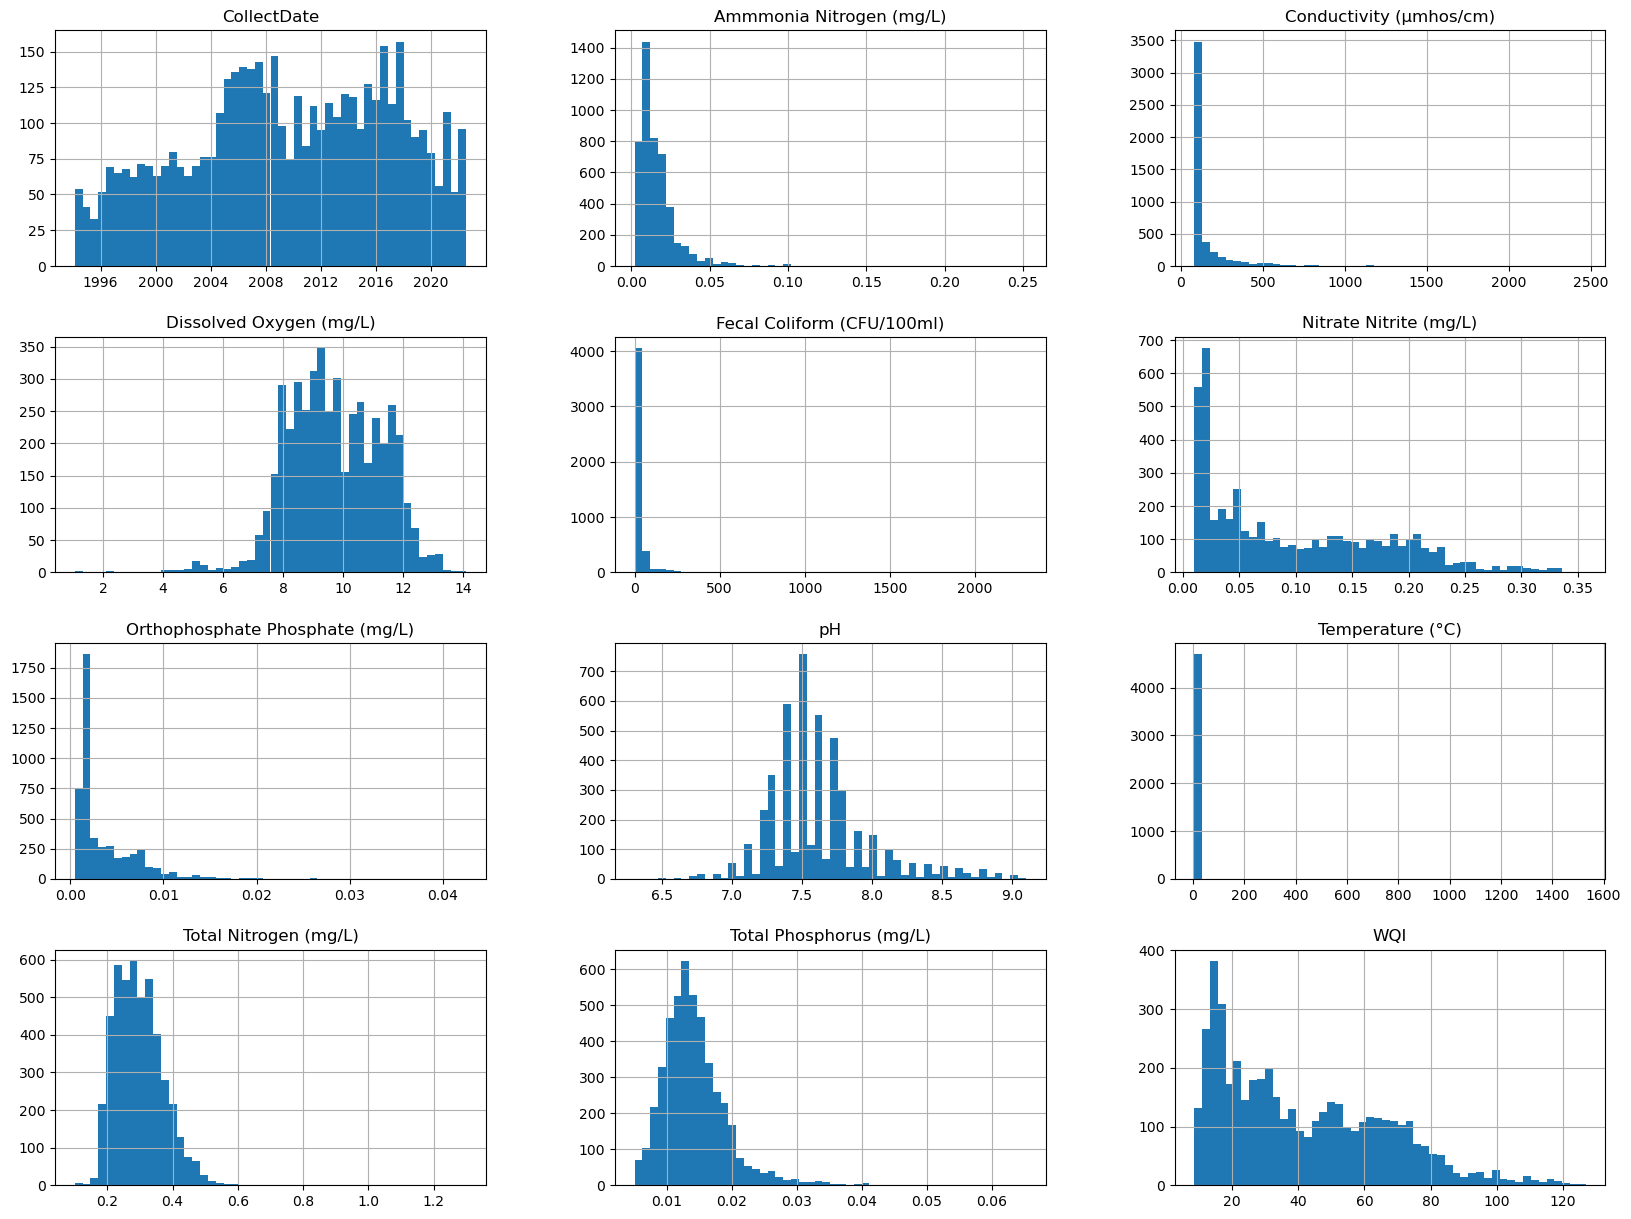

In [39]:
# Histogram shows the number of instances that have a given value range. Using jupyter's magic command to specify which backend Matplotlib should use.
%matplotlib inline
import matplotlib.pyplot as plt
WQI_df.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot: ylabel='Density'>

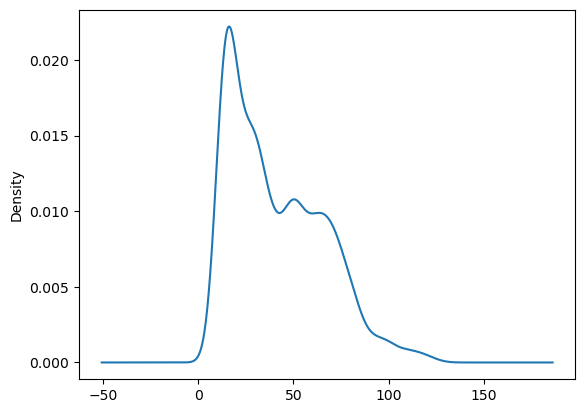

In [40]:
# Visualize the value counts of target variable

WQI_df["WQI"].plot.density()

In [41]:
WQI_df_mean = WQI_df.groupby(["CollectDate"]).mean()
WQI_df_mean.head(20)

,Ammmonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
CollectDate,,,,,,,,,,,
1994-02-14,0.0200,99.360000,11.316000,79.6,0.18800,0.008800,7.360,6.600000,0.36800,0.0203,71.311030
1994-03-07,0.0200,100.980000,10.732000,27.0,0.21700,0.009400,7.440,7.580000,0.63000,0.0279,82.857122
1994-03-21,0.0200,102.520000,11.508000,36.8,0.15400,0.005560,7.600,7.900000,0.34200,0.0204,61.135314
1994-04-04,0.0200,101.600000,12.753333,36.0,0.07000,0.004500,8.500,10.166667,0.32250,0.0445,43.386464
1994-04-18,0.0215,101.600000,12.650000,8.2,0.08370,0.002500,8.560,11.120000,0.36270,0.0176,39.977448
1994-05-02,0.0200,108.420000,11.300000,6.0,0.05000,0.002000,8.680,13.300000,0.23540,0.0205,30.006633
1994-05-23,0.0200,111.060000,10.014000,20.2,0.05000,0.002000,8.300,15.860000,0.52460,0.0183,29.964919
1994-06-06,0.0200,107.060000,10.122000,14.6,0.05000,0.002000,8.120,16.880000,0.20300,0.0241,31.101149
1994-07-05,0.0200,111.660000,8.190000,19.8,0.05000,0.002000,7.300,18.600000,0.23060,0.0196,29.687322


In [42]:
import seaborn as sns

In [43]:
# pip install seaborn

<AxesSubplot: >

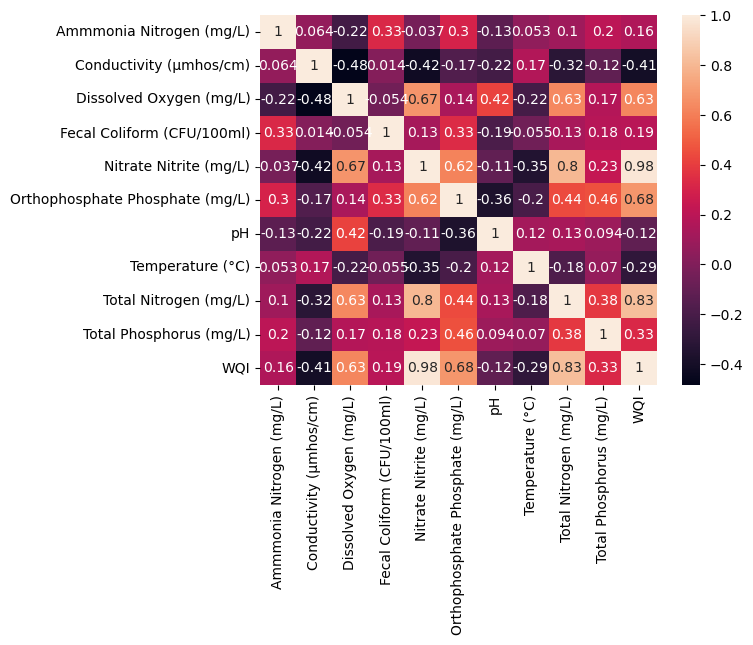

In [44]:
sns.heatmap(WQI_df_mean.corr(), annot=True)

In [45]:
# correlation among the features of each features in the data frame.

corr_matrix = WQI_df_mean.corr()
round(corr_matrix,2)

,Ammmonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
Ammmonia Nitrogen (mg/L),1.00,0.06,-0.22,0.33,-0.04,0.30,-0.13,0.05,0.10,0.20,0.16
Conductivity (µmhos/cm),0.06,1.00,-0.48,0.01,-0.42,-0.17,-0.22,0.17,-0.32,-0.12,-0.41
Dissolved Oxygen (mg/L),-0.22,-0.48,1.00,-0.05,0.67,0.14,0.42,-0.22,0.63,0.17,0.63
Fecal Coliform (CFU/100ml),0.33,0.01,-0.05,1.00,0.13,0.33,-0.19,-0.06,0.13,0.18,0.19
Nitrate Nitrite (mg/L),-0.04,-0.42,0.67,0.13,1.00,0.62,-0.11,-0.35,0.80,0.23,0.98
Orthophosphate Phosphate (mg/L),0.30,-0.17,0.14,0.33,0.62,1.00,-0.36,-0.20,0.44,0.46,0.68
pH,-0.13,-0.22,0.42,-0.19,-0.11,-0.36,1.00,0.12,0.13,0.09,-0.12
Temperature (°C),0.05,0.17,-0.22,-0.06,-0.35,-0.20,0.12,1.00,-0.18,0.07,-0.29
Total Nitrogen (mg/L),0.10,-0.32,0.63,0.13,0.80,0.44,0.13,-0.18,1.00,0.38,0.83
Total Phosphorus (mg/L),0.20,-0.12,0.17,0.18,0.23,0.46,0.09,0.07,0.38,1.00,0.33


In [46]:
# Looking for the correlations between WQI and rest of the features

corr_matrix = WQI_df_mean.corr()

round(corr_matrix["WQI"],2).sort_values(ascending=False)

WQI                                1.00
Nitrate Nitrite (mg/L)             0.98
Total Nitrogen (mg/L)              0.83
Orthophosphate Phosphate (mg/L)    0.68
Dissolved Oxygen (mg/L)            0.63
Total Phosphorus (mg/L)            0.33
Fecal Coliform (CFU/100ml)         0.19
Ammmonia Nitrogen (mg/L)           0.16
pH                                -0.12
Temperature (°C)                  -0.29
Conductivity (µmhos/cm)           -0.41
Name: WQI, dtype: float64

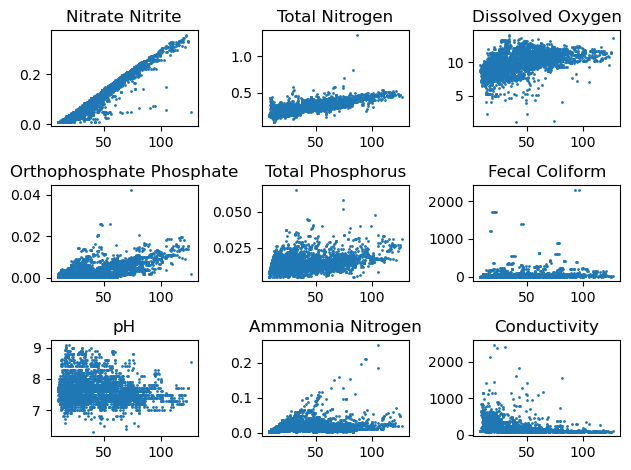

In [47]:
# Scatter plots for each feature with Water Quality Index "WQI"

fig,axis=plt.subplots(3,3)
axis[0,0].scatter(WQI_df["WQI"],WQI_df["Nitrate Nitrite (mg/L)"], s=1) 
axis[0, 0].set_title('Nitrate Nitrite')
axis[0,1].scatter(WQI_df["WQI"],WQI_df["Total Nitrogen (mg/L)"], s=1)
axis[0, 1].set_title('Total Nitrogen')
axis[0,2].scatter(WQI_df["WQI"],WQI_df["Dissolved Oxygen (mg/L)"], s=1)
axis[0, 2].set_title('Dissolved Oxygen')
axis[1,0].scatter(WQI_df["WQI"],WQI_df["Orthophosphate Phosphate (mg/L)"], s=1)
axis[1,0].set_title('Orthophosphate Phosphate')
axis[1,1].scatter(WQI_df["WQI"],WQI_df["Total Phosphorus (mg/L)"], s=1)
axis[1,1].set_title('Total Phosphorus')
axis[1,2].scatter(WQI_df["WQI"],WQI_df["Fecal Coliform (CFU/100ml)"], s=1)
axis[1,2].set_title('Fecal Coliform')
axis[2,0].scatter(WQI_df["WQI"],WQI_df["pH"], s=1)
axis[2,0].set_title('pH')
axis[2,1].scatter(WQI_df["WQI"],WQI_df["Ammmonia Nitrogen (mg/L)"], s=1)
axis[2,1].set_title('Ammmonia Nitrogen')
axis[2,2].scatter(WQI_df["WQI"],WQI_df["Conductivity (µmhos/cm)"], s=1)
axis[2,2].set_title('Conductivity')
plt.tight_layout()
plt.show()

C:\Users\gothw\anaconda3\envs\ul\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='Temperature (°C)', ylabel='WQI'>

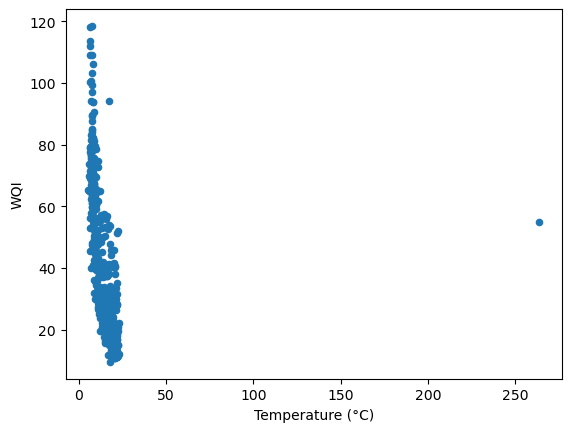

In [48]:
WQI_df_mean.plot(kind="scatter", x="Temperature (°C)", y="WQI")

In [49]:
WQI_df.dtypes

CollectDate                        datetime64[ns]
Ammmonia Nitrogen (mg/L)                  float64
Conductivity (µmhos/cm)                   float64
Dissolved Oxygen (mg/L)                   float64
Fecal Coliform (CFU/100ml)                float64
Nitrate Nitrite (mg/L)                    float64
Orthophosphate Phosphate (mg/L)           float64
pH                                        float64
Temperature (°C)                          float64
Total Nitrogen (mg/L)                     float64
Total Phosphorus (mg/L)                   float64
WQI                                       float64
dtype: object

In [50]:
WQI_df_1 = WQI_df.drop(columns=["CollectDate"])
WQI_df_1.head()

,Ammmonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
0,0.024,99.0,10.9,160.0,0.310,0.0136,7.4,6.6,0.493,0.0289,112.040025
1,0.021,101.0,10.8,160.0,0.302,0.0129,7.3,6.6,0.477,0.0298,108.949937
2,0.027,87.6,10.3,63.0,0.328,0.0134,7.2,6.5,0.452,0.0236,116.578320
3,0.028,93.5,10.7,63.0,0.336,0.0136,7.2,6.5,0.465,0.0265,120.222802
4,0.020,116.0,11.3,160.0,0.344,0.0181,7.5,6.8,0.464,0.0269,120.502157


In [51]:
WQI_df_1["WQI"] = round(WQI_df_1["WQI"],2)

# Compile, Train and Evaluate the Model

In [52]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import sklearn as skl
import tensorflow as tf




In [53]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler

X = WQI_df_1.drop(["WQI"],1).values
y = WQI_df_1["WQI"].values.reshape(-1,1)


# To check the number of shapes
print(X.shape)
print(y.shape)

# To check the first five entries
print(y[:5])


(4694, 10)
(4694, 1)
[[112.04]
 [108.95]
 [116.58]
 [120.22]
 [120.5 ]]


C:\Users\gothw\AppData\Local\Temp\ipykernel_21984\194459523.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = WQI_df_1.drop(["WQI"],1).values


In [54]:
# Create a StandardScaler instances
scaler_X = skl.preprocessing.StandardScaler()
scaler_y = skl.preprocessing.StandardScaler()

# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


# Fit the scaler
scaler_X.fit(X_train)
scaler_y.fit(y_train)

# Scale the data
X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
# y_train_scaled = scaler_y.transform(y_train)
# y_test_scaled = scaler_y.transform(y_test)
y_train
y_test

print(X_train_scaled.shape)
print(y_train.shape)
print(X_test_scaled.shape)
print(y_test.shape)


(3520, 10)
(3520, 1)
(1174, 10)
(1174, 1)


In [56]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense
 
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = 10
hidden_nodes_layer1 = 30
hidden_nodes_layer2 = 15

model = tf.keras.models.Sequential()

# First hidden layer
model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))


# Second hidden layer
model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
model.add(tf.keras.layers.Dense(units=1, activation="linear"))


# Check the structure of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                330       
                                                                 
 dense_7 (Dense)             (None, 15)                465       
                                                                 
 dense_8 (Dense)             (None, 1)                 16        
                                                                 
Total params: 811
Trainable params: 811
Non-trainable params: 0
_________________________________________________________________


In [57]:
#from keras.optimizers import SGD
#opt = SGD(lr=0.01, momentum=0.9)

In [58]:
# Compiling the model
#model.compile(loss='mean_squared_error', optimizer="adam", metrics=["mse"])
model.compile(loss='mean_squared_error', optimizer="adam")

In [59]:
# Fitting the ANN to the Training set
history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled, y_test), epochs=100)

Epoch 1/100
110/110 [==============================] - 0s 2ms/step - loss: 2013.9844 - val_loss: 1596.7970
Epoch 2/100
110/110 [==============================] - 0s 1ms/step - loss: 904.7235 - val_loss: 335.1624
Epoch 3/100
110/110 [==============================] - 0s 1ms/step - loss: 199.9499 - val_loss: 120.9264
Epoch 4/100
110/110 [==============================] - 0s 1ms/step - loss: 117.6924 - val_loss: 84.9539
Epoch 5/100
110/110 [==============================] - 0s 2ms/step - loss: 89.2127 - val_loss: 67.3466
Epoch 6/100
110/110 [==============================] - 0s 2ms/step - loss: 72.3301 - val_loss: 55.0708
Epoch 7/100
110/110 [==============================] - 0s 2ms/step - loss: 58.9579 - val_loss: 44.5533
Epoch 8/100
110/110 [==============================] - 0s 2ms/step - loss: 47.2398 - val_loss: 34.8930
Epoch 9/100
110/110 [==============================] - 0s 2ms/step - loss: 36.6991 - val_loss: 27.0313
Epoch 10/100
110/110 [==============================] - 0s 2ms/s

110/110 [==============================] - 0s 3ms/step - loss: 0.1175 - val_loss: 0.0193
Epoch 82/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1728 - val_loss: 0.0348
Epoch 83/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1928 - val_loss: 0.0167
Epoch 84/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1363 - val_loss: 0.0229
Epoch 85/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0920 - val_loss: 0.0313
Epoch 86/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0541 - val_loss: 0.0236
Epoch 87/100
110/110 [==============================] - 0s 4ms/step - loss: 0.0350 - val_loss: 0.0248
Epoch 88/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0286 - val_loss: 0.0173
Epoch 89/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.0239
Epoch 90/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0262 - val_loss: 

In [60]:
# Making predictions using the testing data.
y_pred = model.predict(X_test_scaled)
print(y_pred.shape)
print(y_pred)


37/37 [==============================] - 0s 979us/step
(1174, 1)
[[39.762566]
 [11.129287]
 [50.102165]
 ...
 [14.555017]
 [81.43942 ]
 [36.53484 ]]


In [61]:

print(y_test)

[[39.72]
 [11.14]
 [49.98]
 ...
 [14.48]
 [81.32]
 [36.44]]


In [62]:
y_pred_new = []
for i in y_pred:
    y_pred_new.append(i[0])
    
y_test_new = []
for i in y_test:
    y_test_new.append(i[0])

In [63]:
import pandas as pd

accuracy_df = pd.DataFrame({"Prediction":y_pred_new, "Actual":y_test_new})
accuracy_df.head(20)


,Prediction,Actual
0,39.762566,39.72
1,11.129287,11.14
2,50.102165,49.98
3,60.759674,60.70
4,44.284729,43.35
5,26.882610,26.92
6,30.681196,30.93
7,53.471561,53.49
8,40.649483,40.60
9,58.326752,58.25


In [64]:
# evaluate the model
train_mse = model.evaluate(X_train_scaled, y_train, verbose=0)
test_mse = model.evaluate(X_test_scaled,y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.044, Test: 0.011


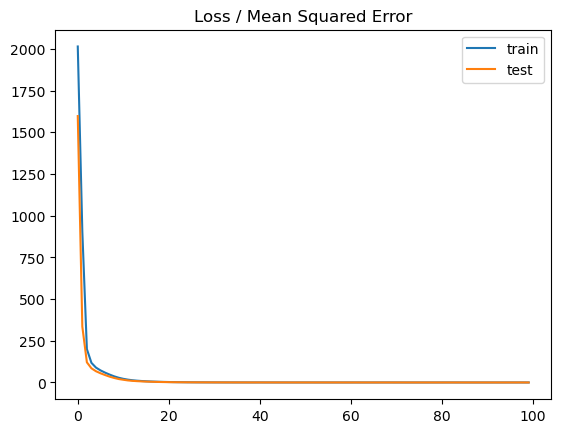

In [65]:
from matplotlib import pyplot
#plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
#pyplot.plot(history.history['mean_squared_error'], label='mse')
pyplot.legend()
pyplot.show()

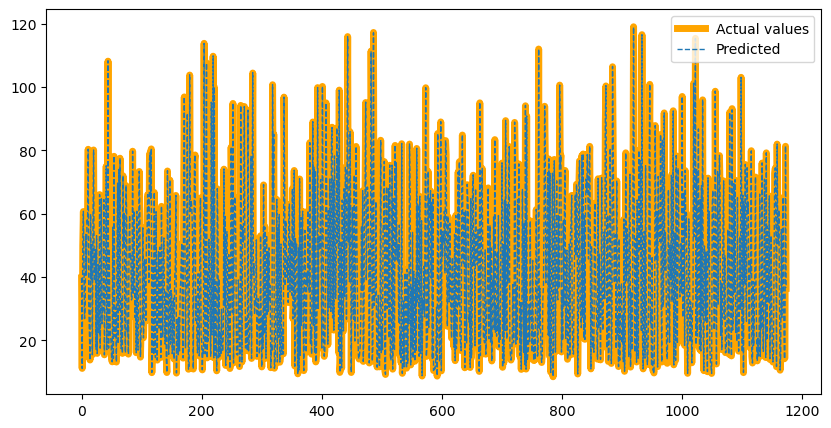

In [66]:
from matplotlib import pyplot
plt.figure(figsize=(10, 5))
plt.title('')
plt.plot(accuracy_df['Actual'], label='Actual values', color='orange', linewidth=5)
plt.plot(accuracy_df['Prediction'], label='Predicted', linewidth=1, linestyle='dashed')
plt.legend()
plt.show()

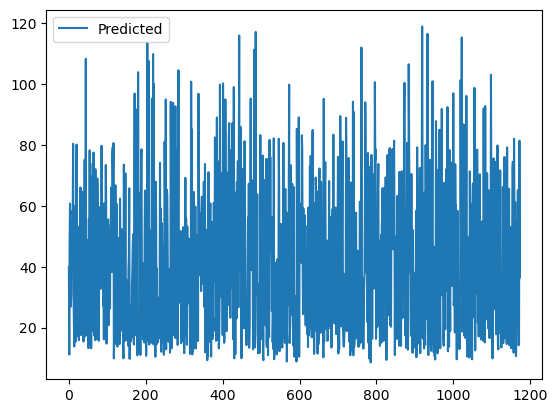

In [67]:
from matplotlib import pyplot
plt.title('')
#plt.plot(accuracy_df['Actual'], label='Actual values')
plt.plot(accuracy_df['Prediction'], label='Predicted')
plt.legend()
plt.show()